# Import das Bibliotecas que serão utilizadas

In [60]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler #Z-score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


## Importando os datasets

Esses datasets fazem parte do Desafio do Kaggle Playground Series - Season 4, Episode 2;
Multi-Class Prediction of Obesity Risk 


https://www.kaggle.com/competitions/playground-series-s4e2

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')  

# Avaliação Inicial dos Dados

In [3]:
train.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
desc = pd.DataFrame(index = list(train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc['min'] = train.min()
desc['max'] = train.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,20758,20758,100.000000,0,0.0,0,20757
Gender,object,20758,2,0.009635,0,0.0,Female,Male
Age,float64,20758,1703,8.204066,0,0.0,14.0,61.0
Height,float64,20758,1833,8.830330,0,0.0,1.45,1.975663
Weight,float64,20758,1979,9.533674,0,0.0,39.0,165.057269
family_history_with_overweight,object,20758,2,0.009635,0,0.0,no,yes
FAVC,object,20758,2,0.009635,0,0.0,no,yes
FCVC,float64,20758,934,4.499470,0,0.0,1.0,3.0
NCP,float64,20758,689,3.319202,0,0.0,1.0,4.0
CAEC,object,20758,4,0.019270,0,0.0,Always,no


Podemos ver que temos 20758 linhas e 18 colunas, contando com o nosso alvo, fazendo com tenhamos 12 features, com pelo menos 8 delas sendo categóricas(Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC e MTRANS). 

## Avaliando o dataset de teste.

In [5]:
test.head(10)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
5,20763,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,no,2.722063,no,2.000000,1.283673,no,Automobile
6,20764,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,no,1.087166,no,0.788585,1.000000,Sometimes,Public_Transportation
7,20765,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,no,2.000000,no,3.000000,0.000000,no,Automobile
8,20766,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,yes,2.000000,no,0.000000,2.000000,no,Public_Transportation
9,20767,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation


In [6]:
desc = pd.DataFrame(index = list(test))
desc['type'] = test.dtypes
desc['count'] = test.count()
desc['nunique'] = test.nunique()
desc['%unique'] = desc['nunique'] / len(test) * 100
desc['null'] = test.isnull().sum()
desc['%null'] = desc['null'] / len(test) * 100
desc['min'] = test.min()
desc['max'] = test.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,13840,13840,100.000000,0,0.0,20758,34597
Gender,object,13840,2,0.014451,0,0.0,Female,Male
Age,float64,13840,1539,11.119942,0,0.0,14.0,61.0
Height,float64,13840,1739,12.565029,0,0.0,1.45,1.98
Weight,float64,13840,1798,12.991329,0,0.0,39.0,165.057269
family_history_with_overweight,object,13840,2,0.014451,0,0.0,no,yes
FAVC,object,13840,2,0.014451,0,0.0,no,yes
FCVC,float64,13840,828,5.982659,0,0.0,1.0,3.0
NCP,float64,13840,649,4.689306,0,0.0,1.0,4.0
CAEC,object,13840,4,0.028902,0,0.0,Always,no


No dataset de teste temos 13840 linhas. Não existe nenhum valor faltante em ambos os datasets.

# Análise Exploratória

In [7]:
raw_num_cols = list(train.select_dtypes("float").columns) 
raw_cat_cols = list(train.columns.drop(raw_num_cols+['NObeyesdad']))
full_form = {
    'Gender': 'Gênero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history_with_overweight': 'Histórico de sobrepeso na família',
    'FAVC': 'Frequência de consumo de alimentos de alta caloria',
    'FCVC': 'Frequência de consumo de vegetais',
    'NCP': 'Número de refeições principais',
    'CAEC': 'Consumo de alimentos entre refeições',
    'SMOKE': 'Fuma',
    'CH2O': 'Consumo de água',
    'SCC': 'Monitora consumo de calorias',
    'FAF': 'Frequência de atividade física',
    'TUE': 'Tempo de uso de eletrônicos',
    'CALC': 'Consumo de álcool',
    'MTRANS': 'Transporte utilizado'
}


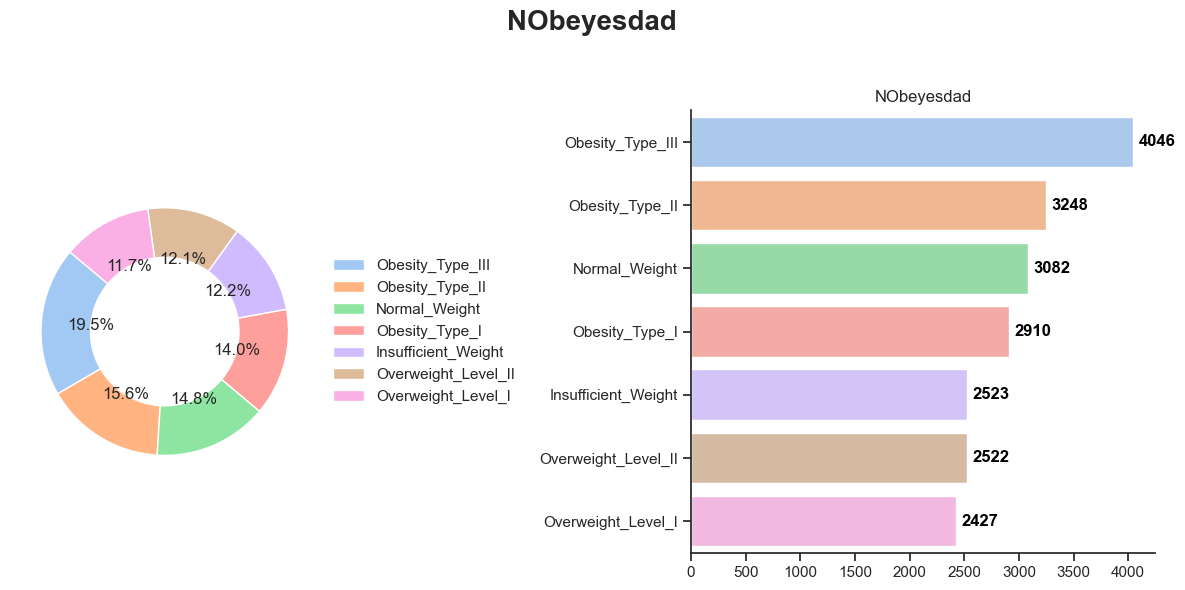

In [8]:
counts = train['NObeyesdad'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

# Gráfico de rosca (donut)
wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

# Gráfico de barras horizontais
sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('NObeyesdad')

# Título geral
fig.suptitle('NObeyesdad', fontsize=20, fontweight='bold')

# Ajuste de layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Podemos ver que a Obesidade tipo 3 é a mais predominante com cerca de 19.5% do casos. E vemos também que pelo menos 49.1% possui algum tipo de obesidade.

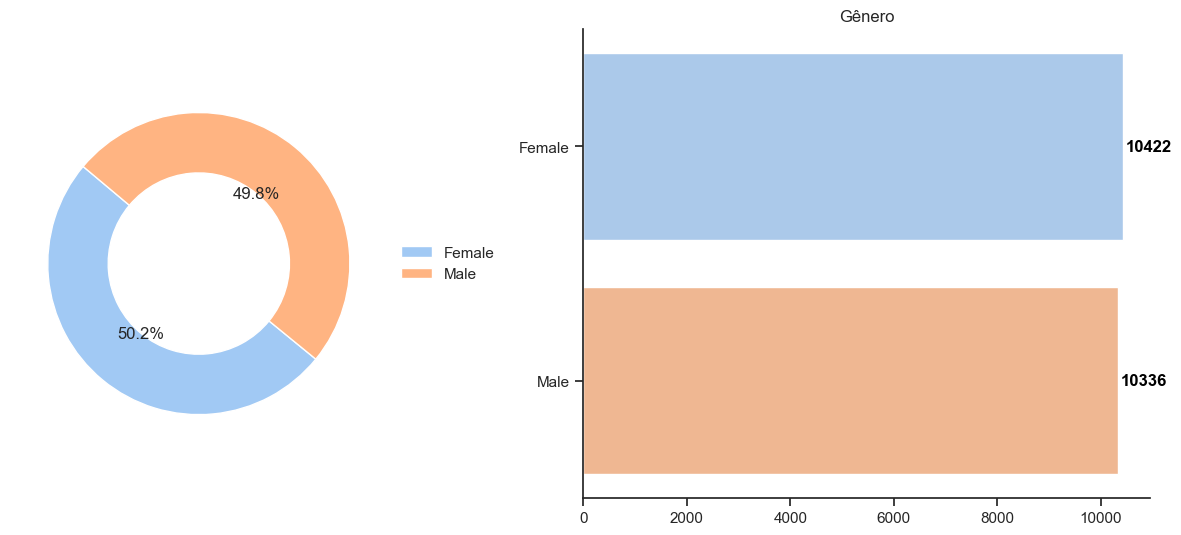

In [9]:
counts = train['Gender'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

# Gráfico de rosca (donut)
wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

# Gráfico de barras horizontais
sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['Gender'])

# Título geral
fig.suptitle('', fontsize=20, fontweight='bold')

# Ajuste de layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Podemos ver um distrubuição semelhante de Homens e Mulheres.

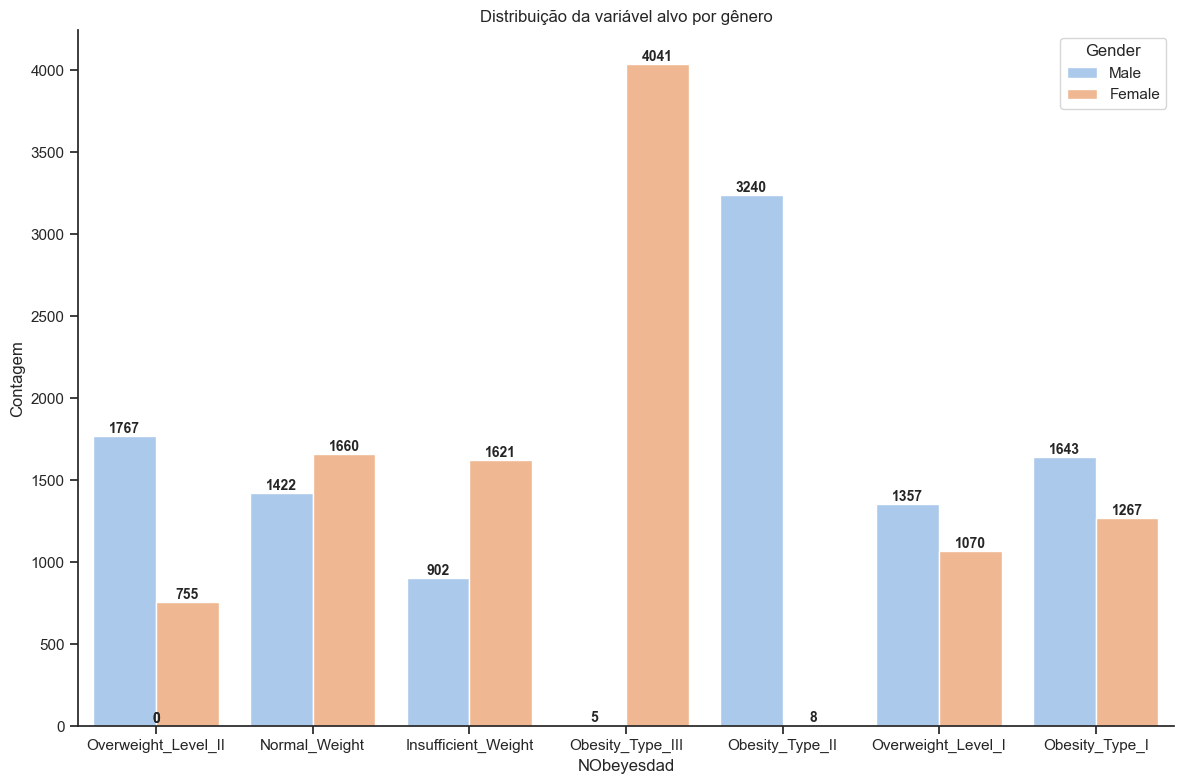

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=train, x='NObeyesdad', hue='Gender', palette = 'pastel')
plt.title('Distribuição da variável alvo por gênero')
plt.xlabel('NObeyesdad')
plt.ylabel('Contagem')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Com base no gráfico anterior podemos ver que a Obesidade tipo 3 acontece predominantemente em mulheres, enquanto a do tipo 2 em homens.

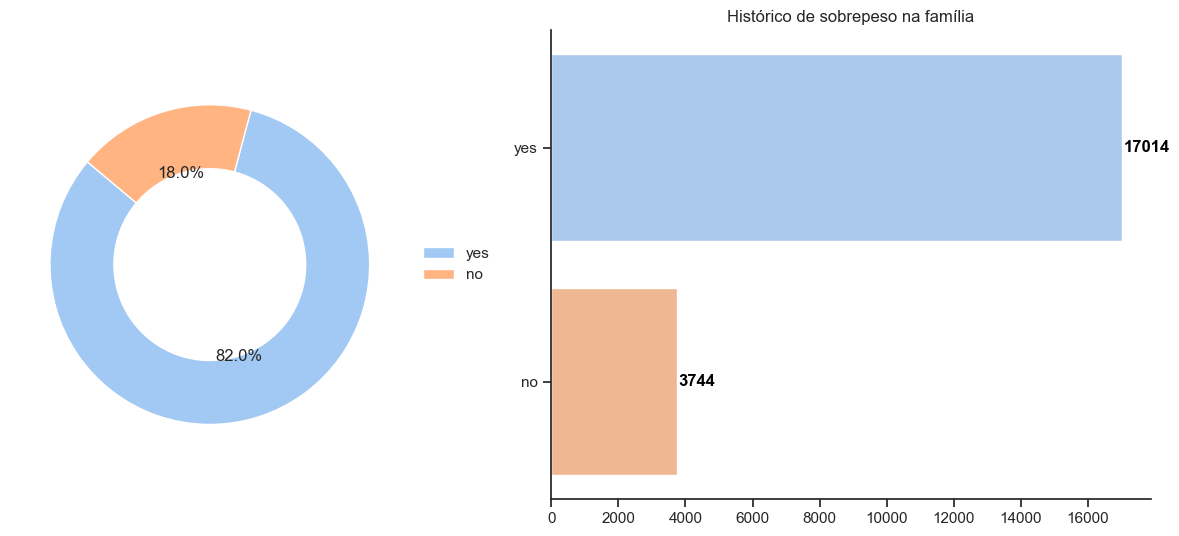

In [11]:
counts = train['family_history_with_overweight'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['family_history_with_overweight'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

82% possui histórico de sobrepeso na família.

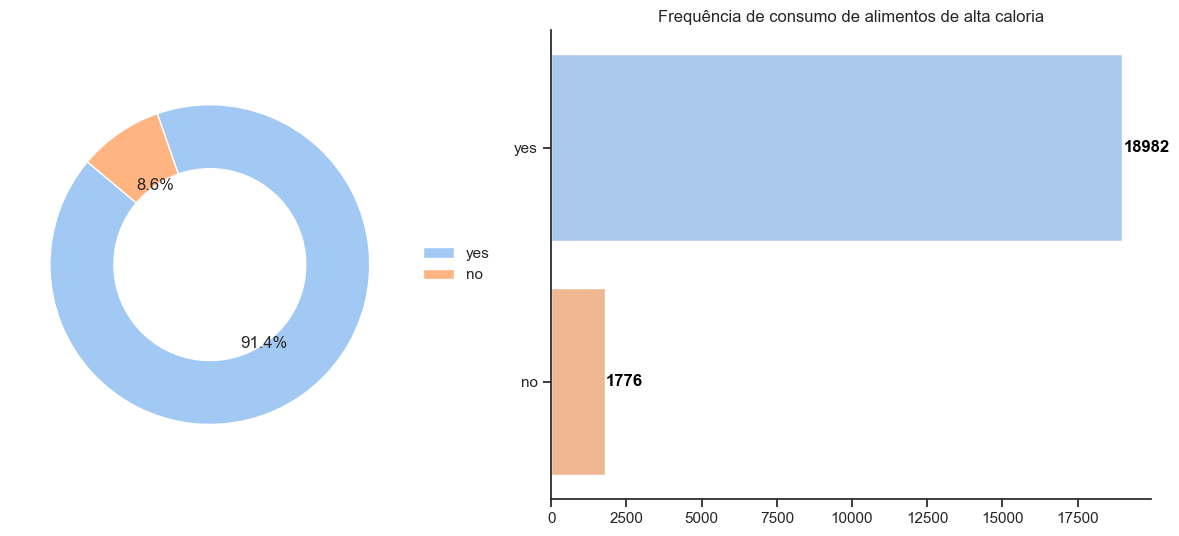

In [12]:
counts = train['FAVC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['FAVC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

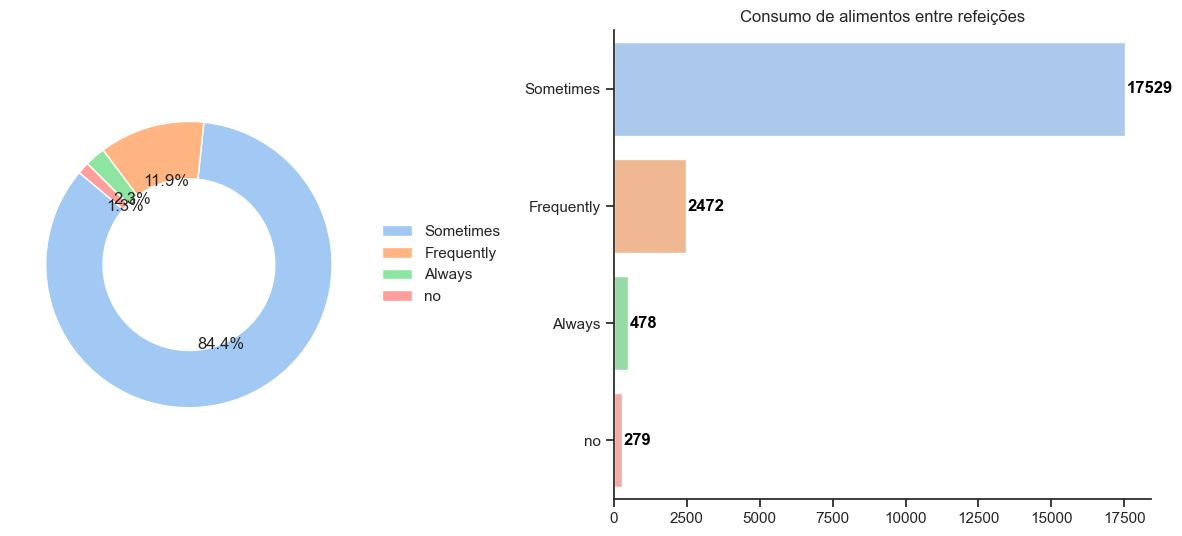

In [13]:
counts = train['CAEC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['CAEC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Temos que apenas aproximadamente 1.3% não consome alimentos entre refeições.

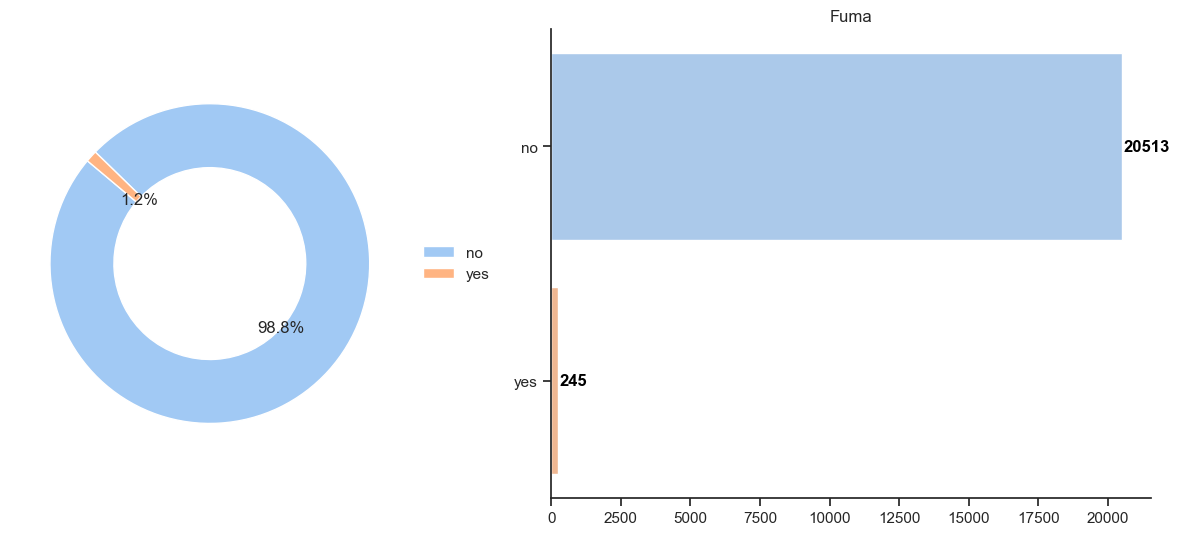

In [14]:
counts = train['SMOKE'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['SMOKE'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

A grande maioria diz não fumar.

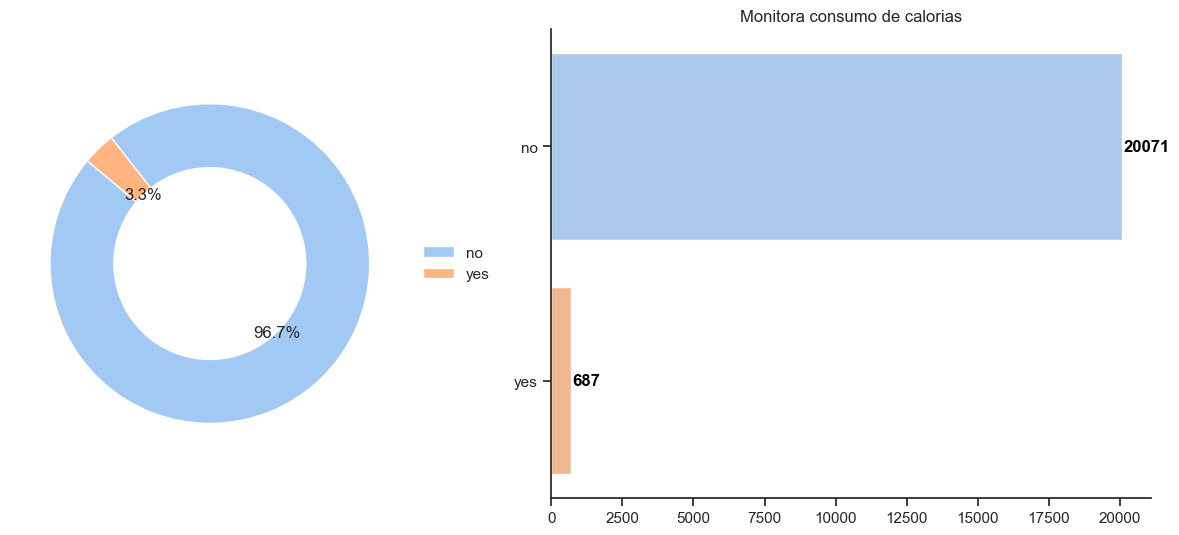

In [15]:
counts = train['SCC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['SCC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

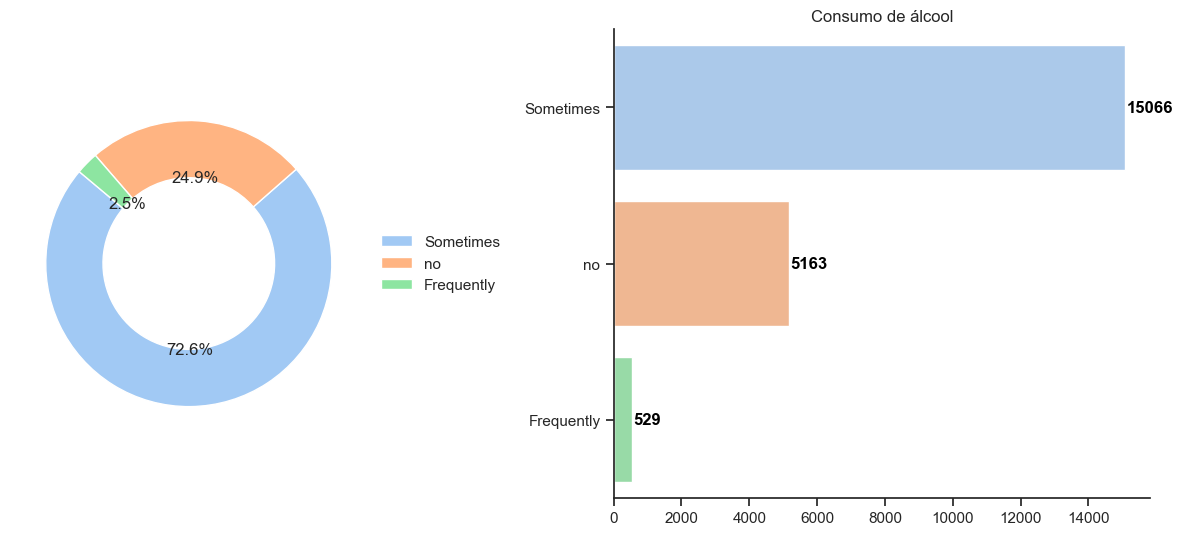

In [16]:
counts = train['CALC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['CALC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

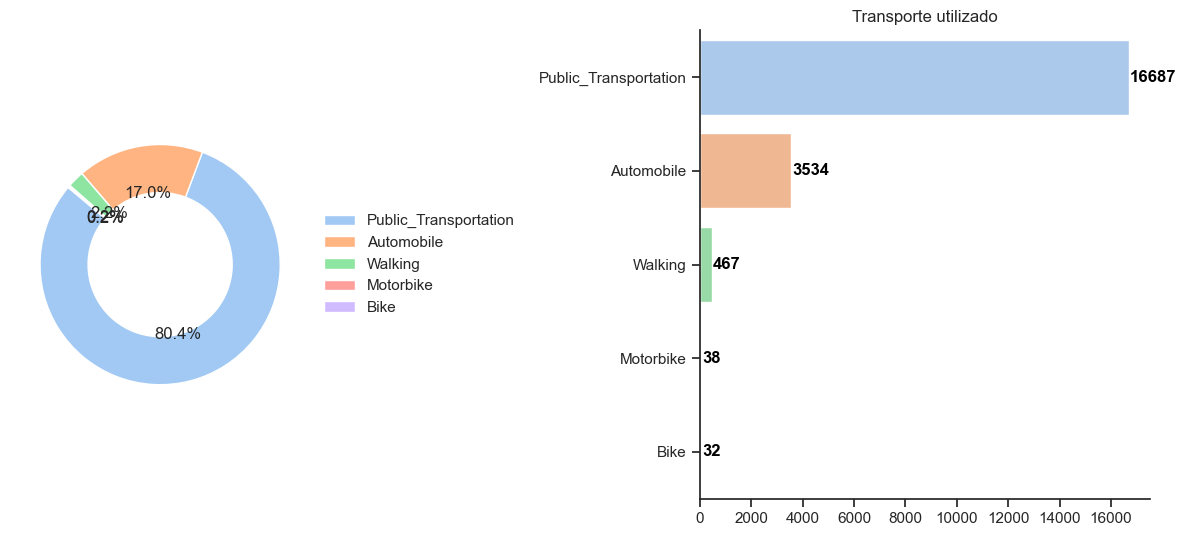

In [17]:
counts = train['MTRANS'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts, 
    labels=None, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index, 
    x=counts.values, 
    ax=ax[1], 
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['MTRANS'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

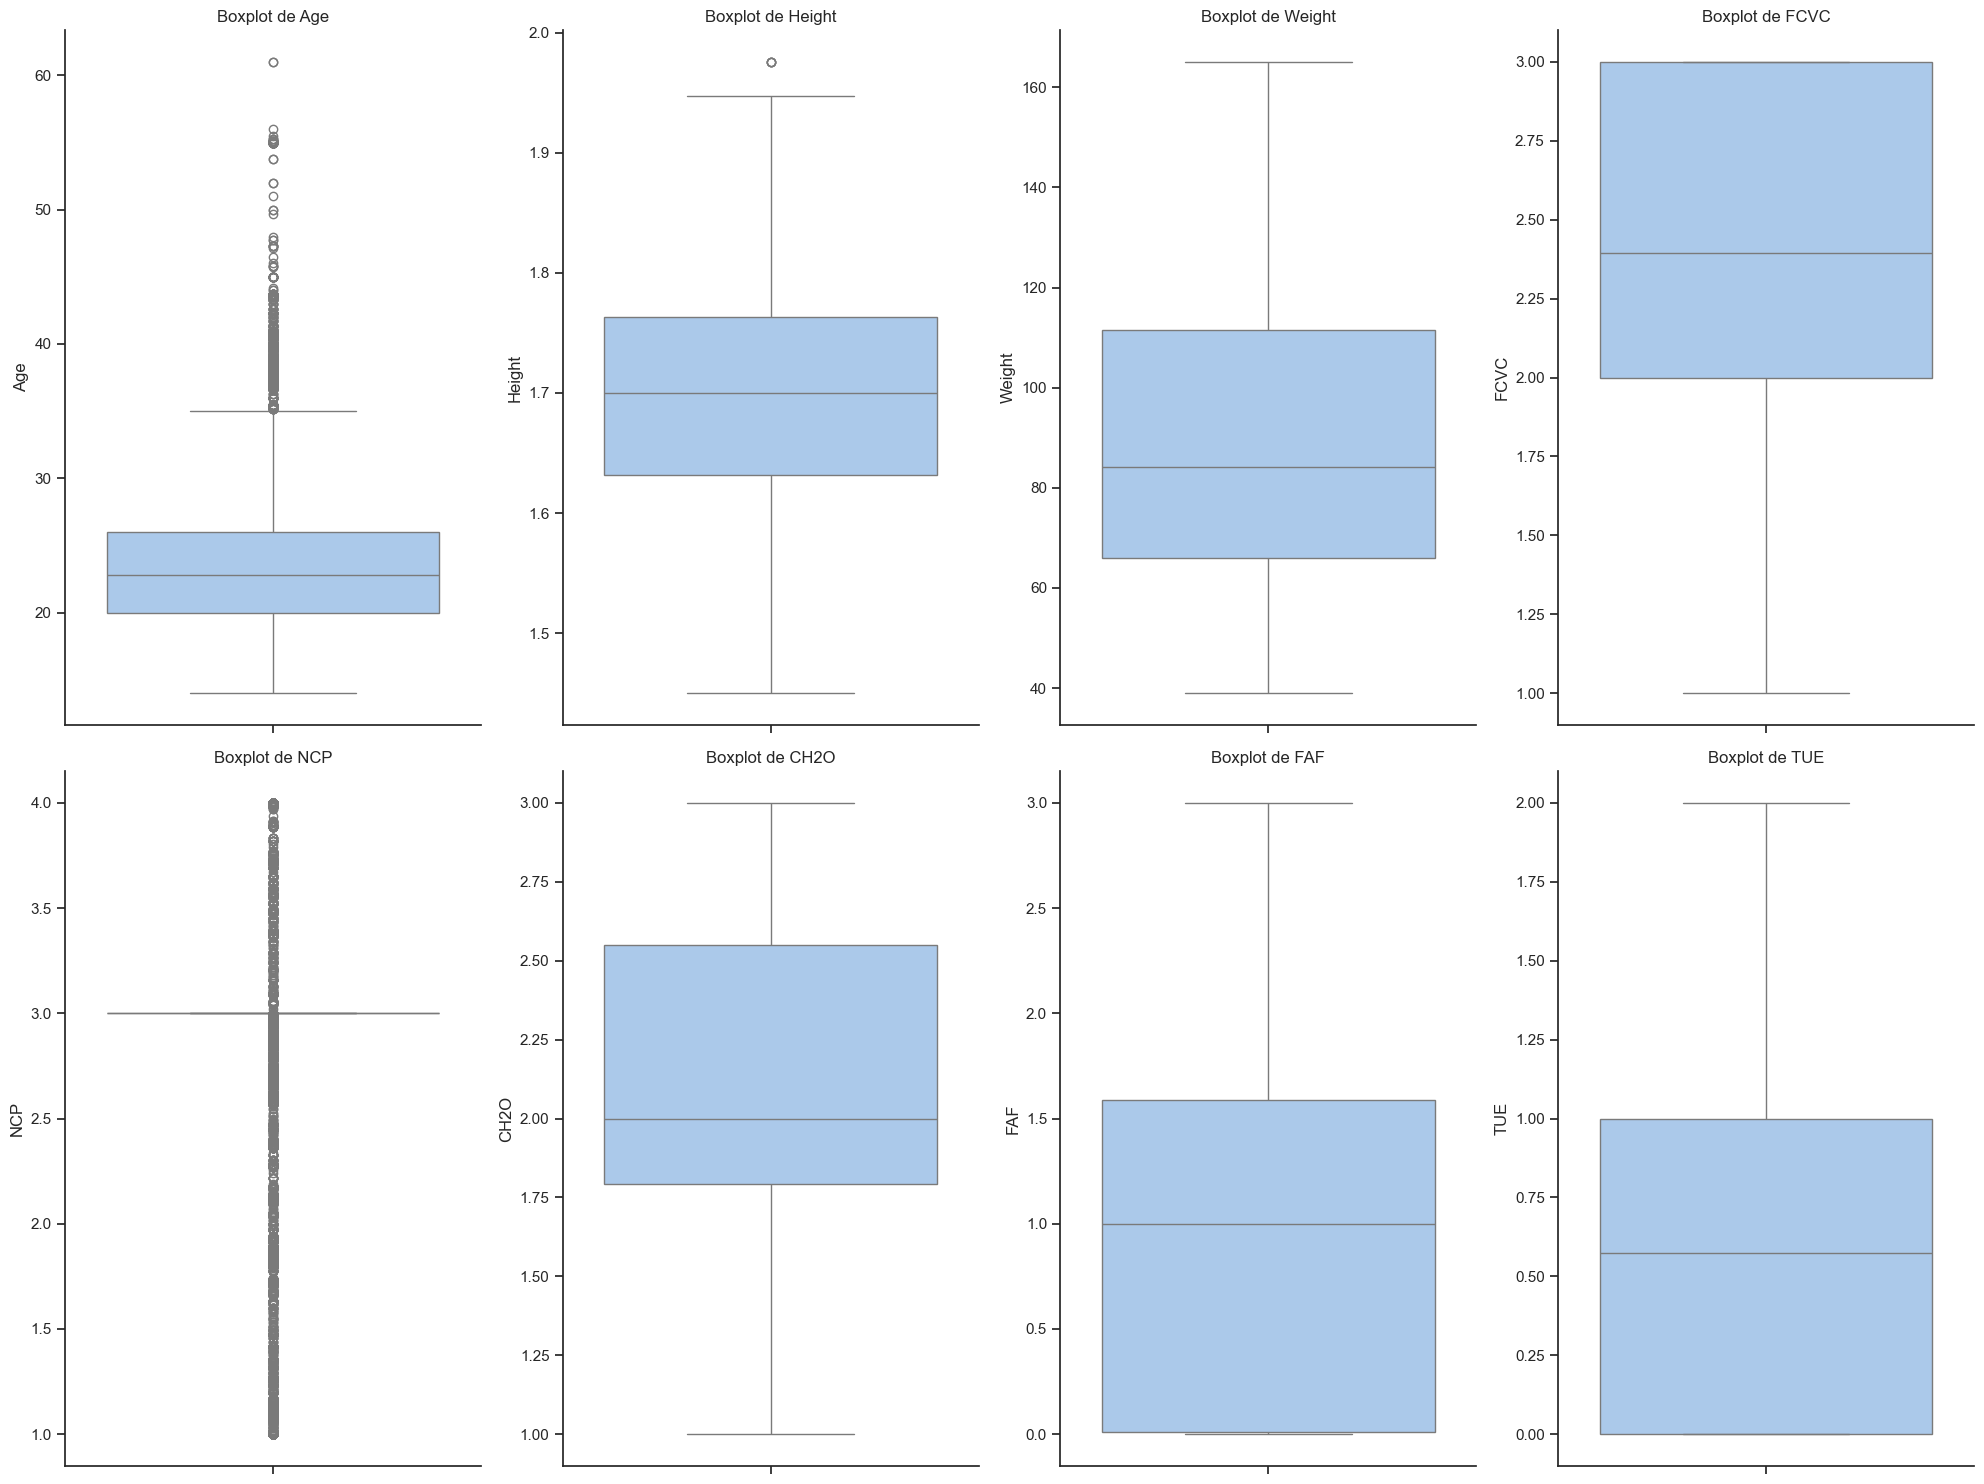

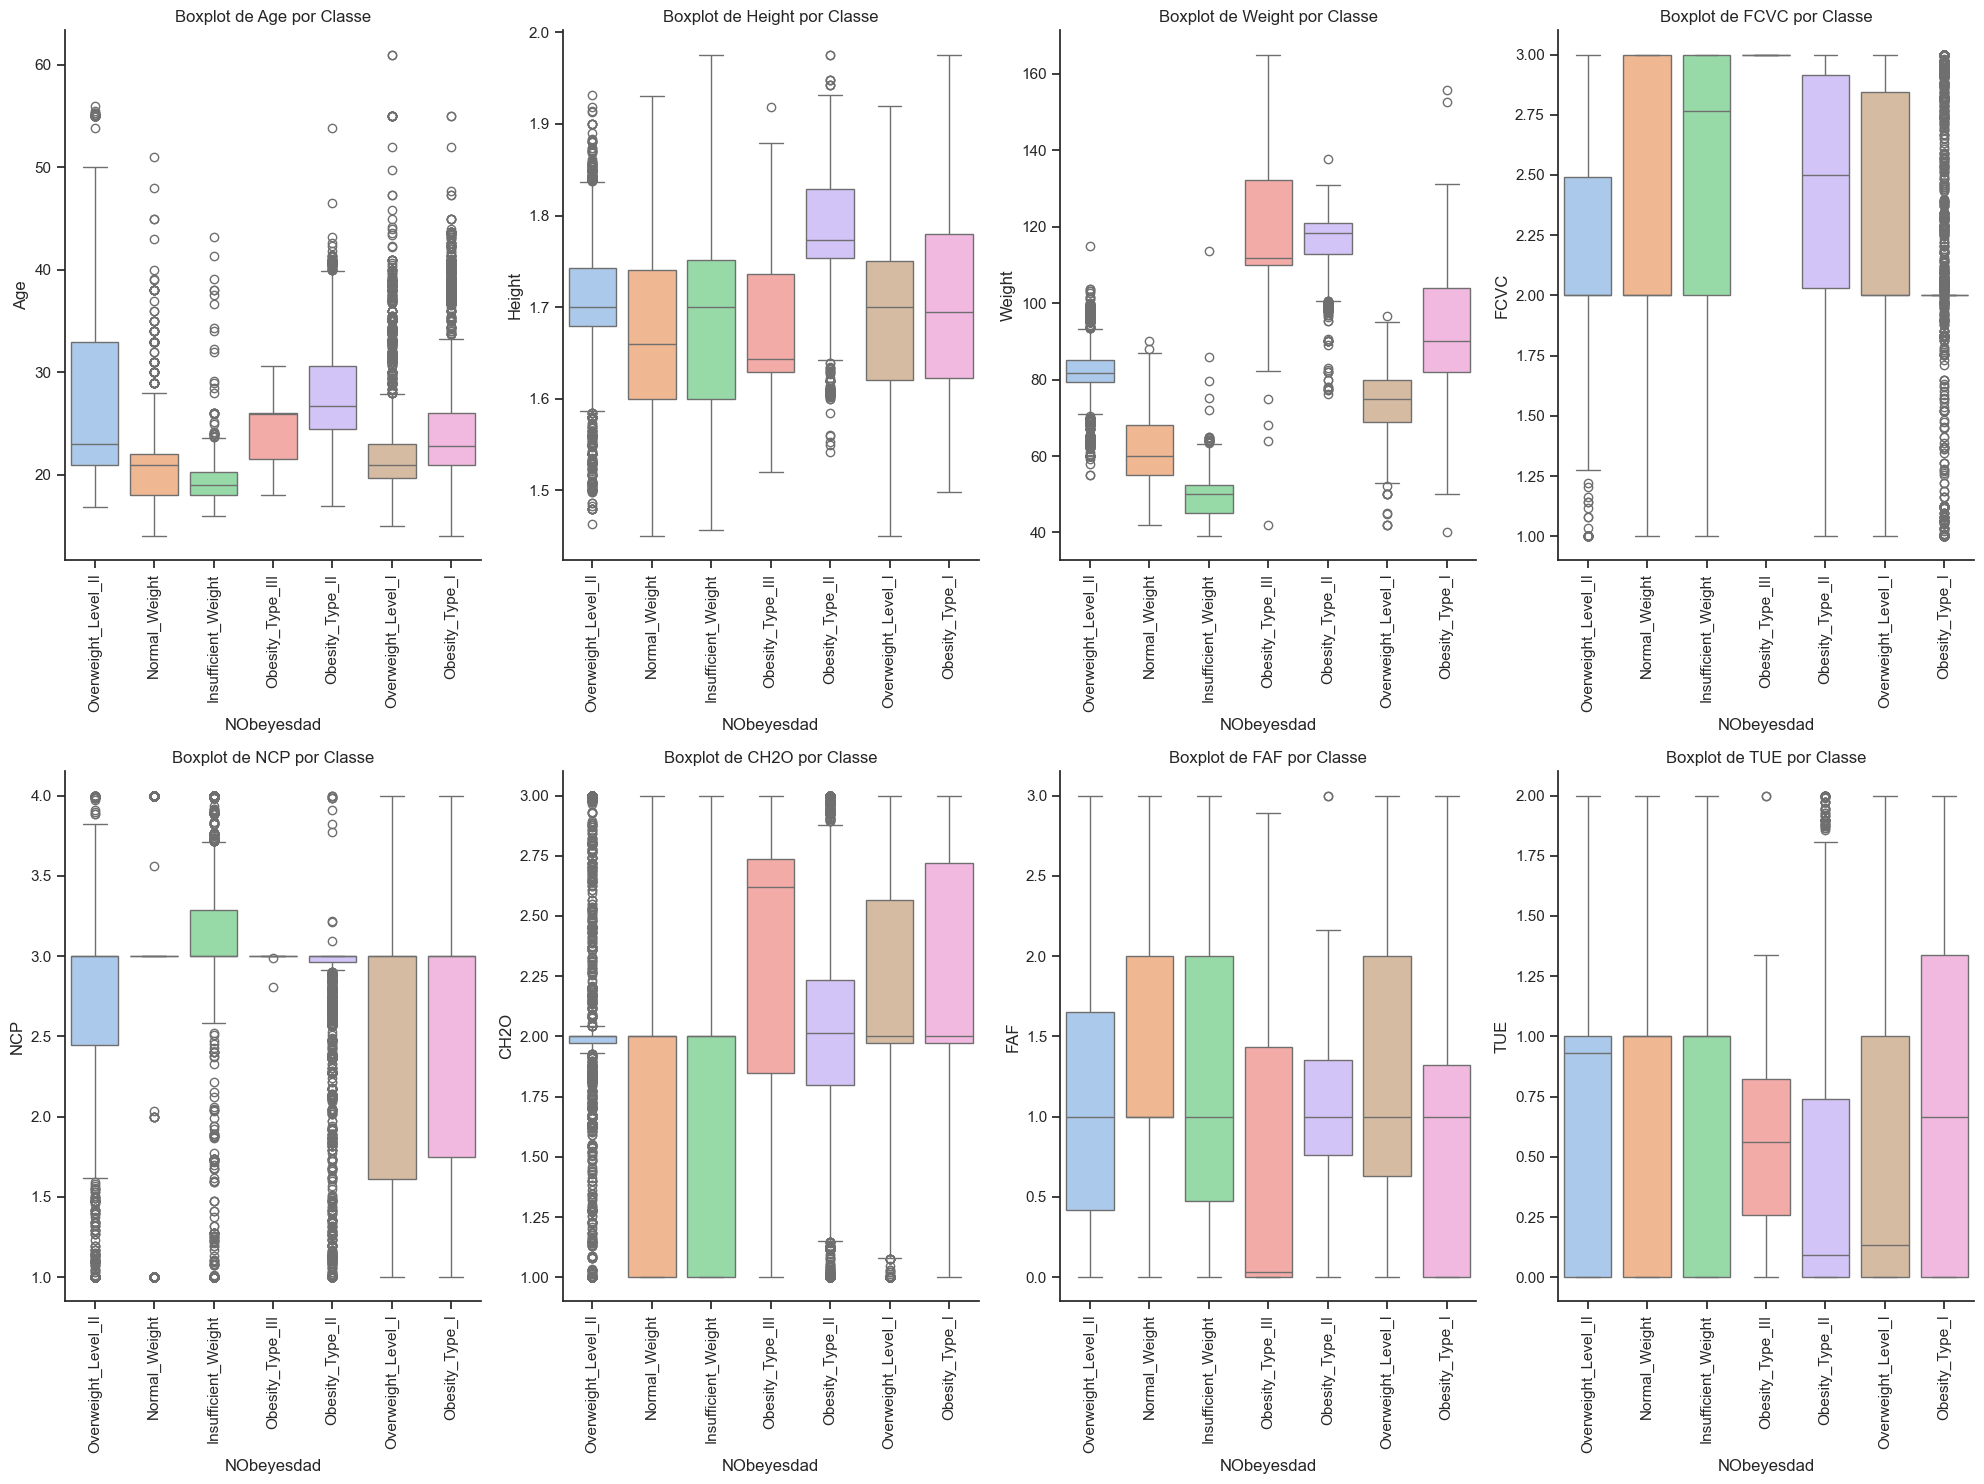

In [18]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(raw_num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=train, y=column, palette='pastel')
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

# Boxplots por classe
plt.figure(figsize=(20, 15))
for i, column in enumerate(raw_num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=train, x='NObeyesdad', y=column, palette='pastel')
    plt.title(f'Boxplot de {column} por Classe')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: >

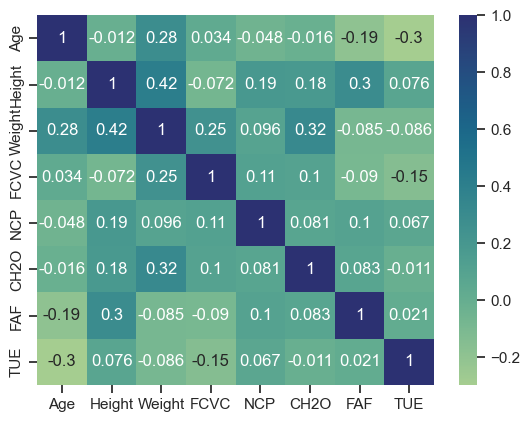

In [19]:
tmp = train[raw_num_cols].corr("pearson")
sns.heatmap(tmp,annot=True,cmap ="crest")

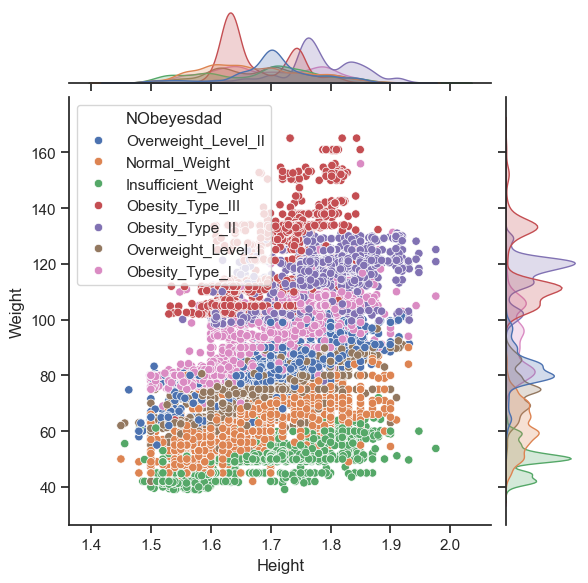

In [20]:
sns.jointplot(data=train, x="Height", y="Weight", hue='NObeyesdad',height=6)

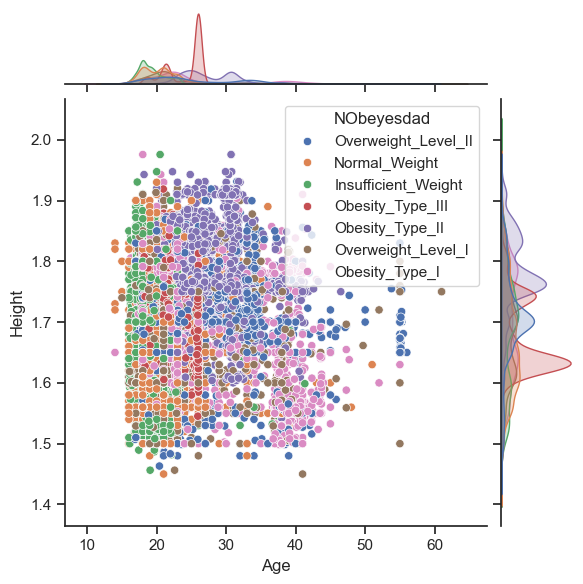

In [21]:
sns.jointplot(data=train, x="Age", y="Height", hue='NObeyesdad',height=6)


# Pré-processamento dos dados

## Transformando os dados categóricos em numéricos

In [22]:
train['NObeyesdad'].unique()


array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [23]:
target_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

train['NObeyesdad'] = train['NObeyesdad'].map(target_map)
train['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4])

In [24]:
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})

train['Gender'].unique()

array([0, 1])

In [25]:
test['Gender'].unique()

array([0, 1])

In [26]:
train['family_history_with_overweight'] = train['family_history_with_overweight'].map({'yes': 1, 'no': 0})
test['family_history_with_overweight'] = test['family_history_with_overweight'].map({'yes': 1, 'no': 0})
train['family_history_with_overweight'].unique()


array([1, 0])

In [27]:
test['family_history_with_overweight'].unique()


array([1, 0])

In [28]:
train['FAVC'] = train['FAVC'].map({'no': 0, 'yes': 1})
test['FAVC'] = test['FAVC'].map({'no': 0, 'yes': 1})
train['FAVC'].unique()

array([1, 0])

In [29]:
test['FAVC'].unique()

array([1, 0])

In [30]:
train['CAEC'] = train['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
test['CAEC'] = test['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
train['CAEC'].unique()

array([1, 2, 0, 3])

In [31]:
test['CAEC'].unique()

array([1, 3, 2, 0])

In [32]:
train['SMOKE'] = train['SMOKE'].map({'no': 0, 'yes': 1})
test['SMOKE'] = test['SMOKE'].map({'no': 0, 'yes': 1})
train['SMOKE'].unique()


array([0, 1])

In [33]:
test['SMOKE'].unique()

array([0, 1])

In [34]:
train['SCC'] = train['SCC'].map({'no': 1, 'yes': 0})
test['SCC'] = test['SCC'].map({'no': 1, 'yes': 0})
train['SCC'].unique()


array([1, 0])

In [35]:
test['SCC'].unique()

array([1, 0])

In [36]:
train['CALC'] = train['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2})
test['CALC'] = test['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2})
train['CALC'].unique()

array([1, 0, 2])

In [37]:
test['CALC'].unique()

array([ 1.,  0.,  2., nan])

In [40]:
train['MTRANS'] = train['MTRANS'].map({'Walking': 1, 'Bike': 0, 'Motorbike': 2, 'Public_Transportation': 4, 'Automobile': 3})
test['MTRANS'] = test['MTRANS'].map({'Walking': 1, 'Bike': 0, 'Motorbike': 2, 'Public_Transportation': 4, 'Automobile': 3})
train['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [41]:
test['MTRANS'].unique()

array([4, 3, 1, 0, 2])

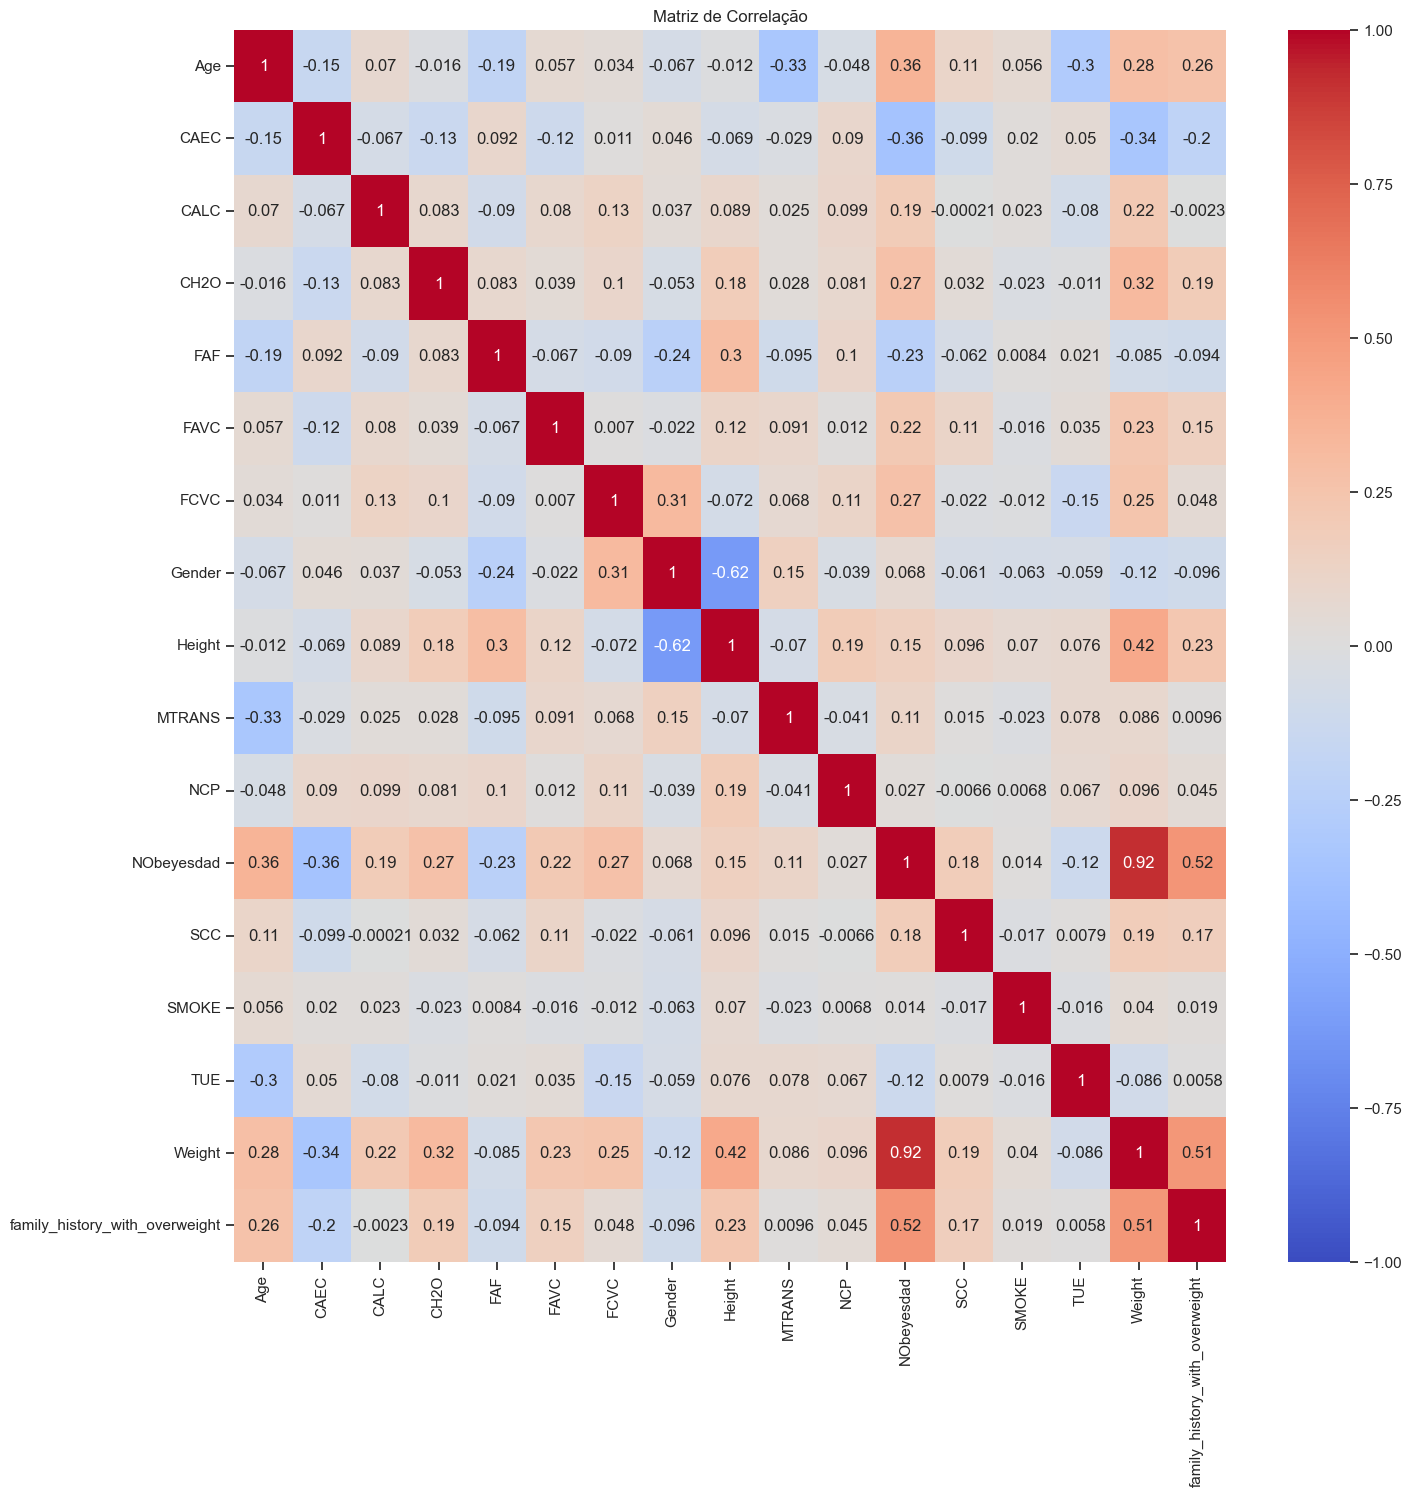

In [46]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)
train = train.astype(float)
test = test.astype(float)

corr_matrix = train.corr()

sorted_corr = corr_matrix['NObeyesdad'].sort_index(ascending=True)

corr_columns = sorted_corr.index

subset_corr = corr_matrix.loc[corr_columns, corr_columns]

plt.figure(figsize=(16, 16))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()




In [50]:
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Utilizando Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
folds = [3, 5, 7, 9]

for fold in folds:
    scores = cross_val_score(gnb, X_train, y_train, cv=fold)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))




0.65 accuracy with a standard deviation of 0.01
0.66 accuracy with a standard deviation of 0.01
0.66 accuracy with a standard deviation of 0.00
0.66 accuracy with a standard deviation of 0.01


In [62]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_pred, y_test))
print("A acurácia do modelo Naive Bayes é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))


              precision    recall  f1-score   support

         0.0       0.85      0.68      0.75       655
         1.0       0.44      0.61      0.51       450
         2.0       0.30      0.60      0.40       244
         3.0       0.24      0.52      0.33       236
         4.0       0.61      0.38      0.46       877
         5.0       0.93      0.71      0.81       858
         6.0       1.00      0.96      0.98       832

    accuracy                           0.66      4152
   macro avg       0.62      0.64      0.61      4152
weighted avg       0.73      0.66      0.68      4152

A acurácia do modelo Naive Bayes é de: 65.66 %


Temos uma baseline de 65.66% de acurácia

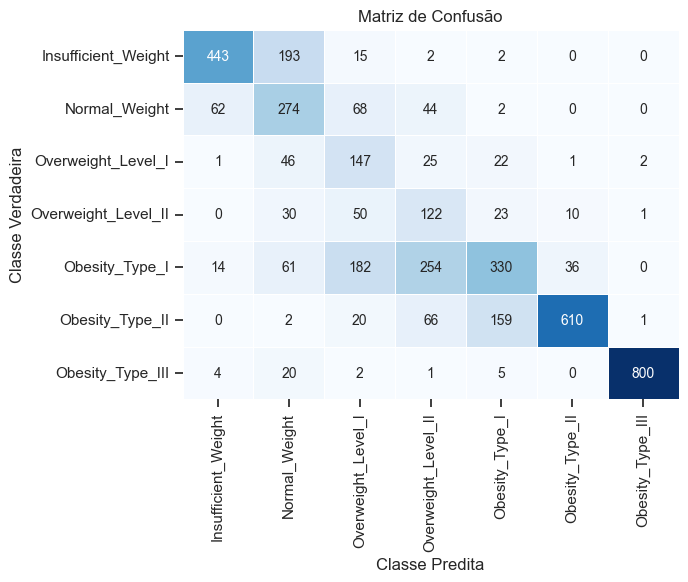

In [63]:
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()


## Utilizando SVM

In [64]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))
print("A acurácia do modelo SVM é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       562
         1.0       0.79      0.86      0.83       578
         2.0       0.74      0.72      0.73       499
         3.0       0.69      0.73      0.71       492
         4.0       0.84      0.82      0.83       553
         5.0       0.97      0.96      0.96       664
         6.0       1.00      1.00      1.00       804

    accuracy                           0.87      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.87      0.87      0.87      4152

A acurácia do modelo SVM é de: 86.58 %


Text(47.10937499999999, 0.5, 'Classe Verdadeira')

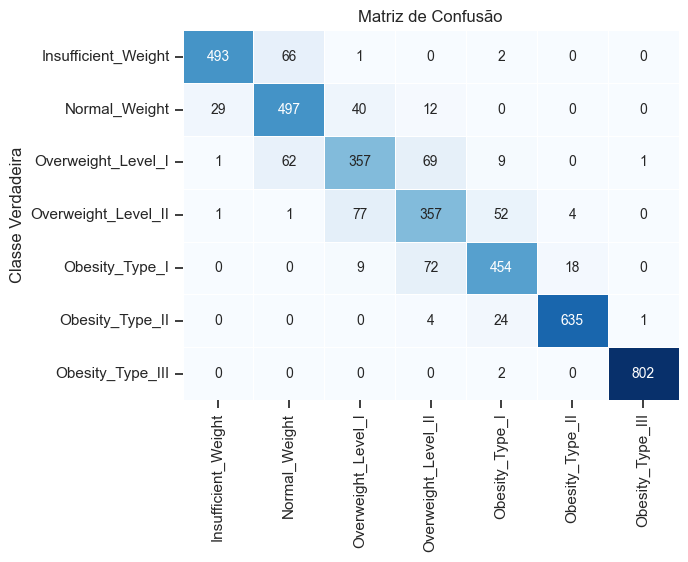

In [65]:
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')

In [71]:
folds = [3, 5, 7, 9]

for fold in folds:
    scores = cross_val_score(clf, X_train, y_train, cv=fold)
    print("%0.2f de acurácia média com um desvio padrão de %0.2f, utilizando %d folds" % (scores.mean(), scores.std(), fold))

0.86 de acurácia média com um desvio padrão de 0.00, utilizando 3 folds
0.86 de acurácia média com um desvio padrão de 0.01, utilizando 5 folds
0.86 de acurácia média com um desvio padrão de 0.01, utilizando 7 folds
0.86 de acurácia média com um desvio padrão de 0.01, utilizando 9 folds


## Utilizando Floresta Aleatória

In [67]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = random_forest.predict(X_test)

print(classification_report(y_pred, y_test))
print("A acurácia do modelo Floresta Aleatória é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       511
         1.0       0.88      0.84      0.86       654
         2.0       0.76      0.76      0.76       481
         3.0       0.78      0.79      0.78       511
         4.0       0.87      0.89      0.88       532
         5.0       0.98      0.97      0.97       658
         6.0       1.00      1.00      1.00       805

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152

A acurácia do modelo Floresta Aleatória é de: 89.38 %


In [69]:
folds = [3, 5, 7, 9]
for fold in folds:
    scores = cross_val_score(random_forest, X_train, y_train, cv=fold)
    print("%0.2f de acurácia com um desvio padrão de %0.2f" % (scores.mean(), scores.std()))



0.90 accuracy with a standard deviation of 0.01
